# Goal - Analysis and Customer Segmentation of the given dataset:

In [1]:
#Importing the various libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset and dropping off any duplicate rows
df = pd.read_csv(r"transaction_data.csv").drop_duplicates(keep='first')
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [5]:
#Checking if any NaN values are present in the dataset
cols = df.columns
null_cols = []
for c in cols:
    if df[c].isnull().values.any() == True:
        null_cols.append(c)

null_cols=np.unique(np.array(null_cols))
null_cols=null_cols.tolist()
null_cols #Columns in the train dataset that have NaN value

['ItemDescription']

## Expolatory Data Analysis: -

#### 1. Number of purchases from the different countries:

In [6]:
countries = np.unique(df['Country'].values)
count_countries={}
total = len(df)
for c in countries:
    count_countries[c]=(len(df[df['Country']==c])*100.0/total) #Percentage contribution to total purchases per country
count_countries= pd.Series(count_countries).sort_values(ascending=False)
count_countries #EDA Output-1

United Kingdom          91.363880
Germany                  1.766771
France                   1.591771
EIRE                     1.525238
Spain                    0.471139
Netherlands              0.441879
Belgium                  0.385596
Switzerland              0.371618
Portugal                 0.281416
Australia                0.234451
Norway                   0.202396
Italy                    0.149654
Channel Islands          0.141081
Finland                  0.129526
Cyprus                   0.113685
Sweden                   0.085916
Unspecified              0.082375
Austria                  0.074734
Denmark                  0.072497
Japan                    0.066720
Poland                   0.063552
Israel                   0.054606
USA                      0.054233
Hong Kong                0.052929
Singapore                0.042678
Iceland                  0.033919
Canada                   0.028142
Greece                   0.027210
Malta                    0.023669
United Arab Em

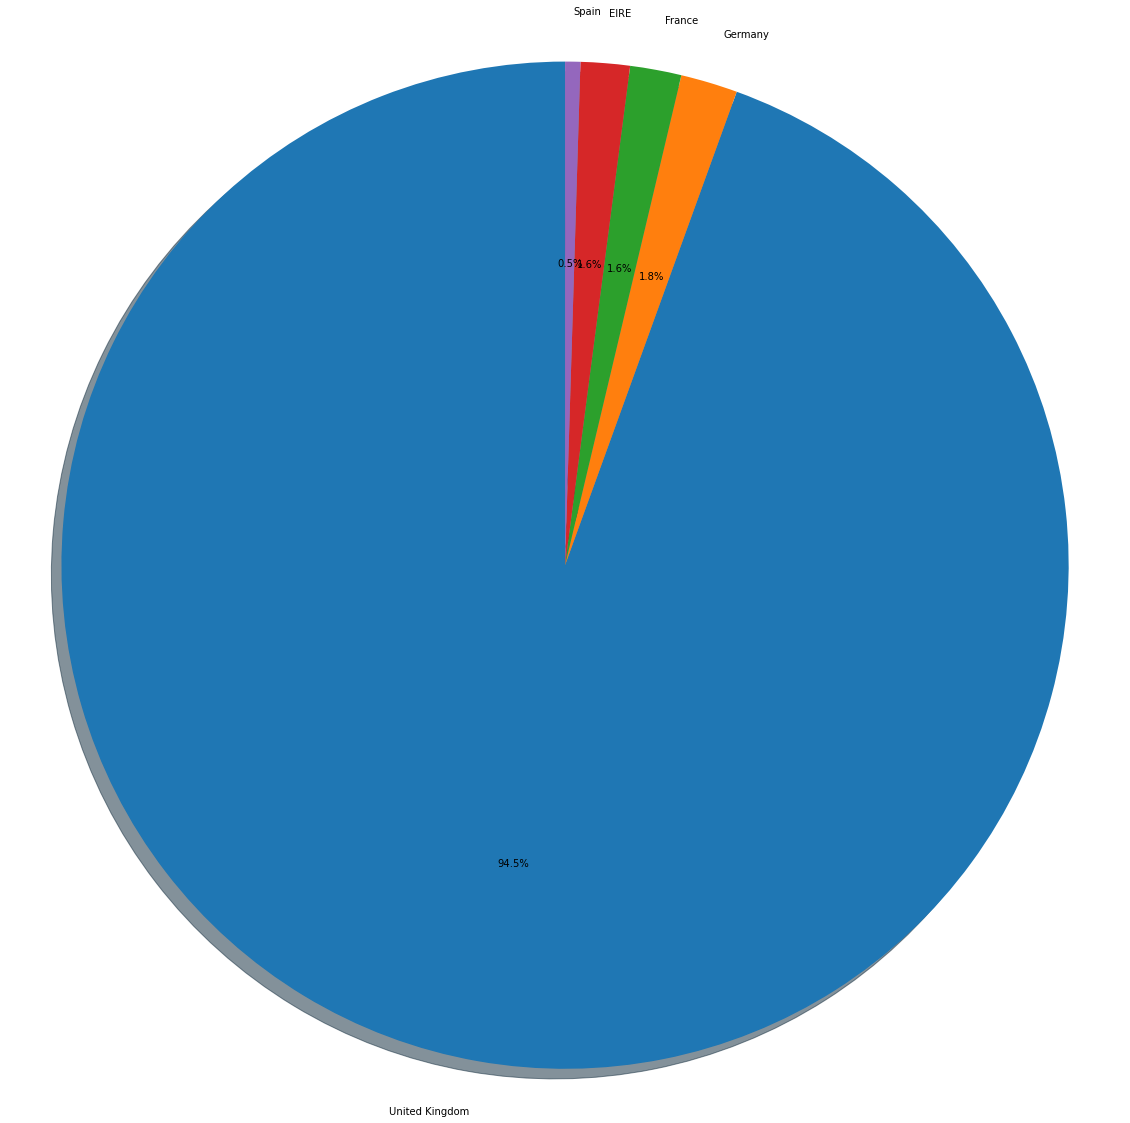

In [7]:
# Pie chart of top 5 countries in terms of purchase
plt.figure(figsize=(20,20))
plt.pie(count_countries[:5].values, labels=count_countries[:5].index, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0.5, 1.0, 'Top 5 most purchasing countries')

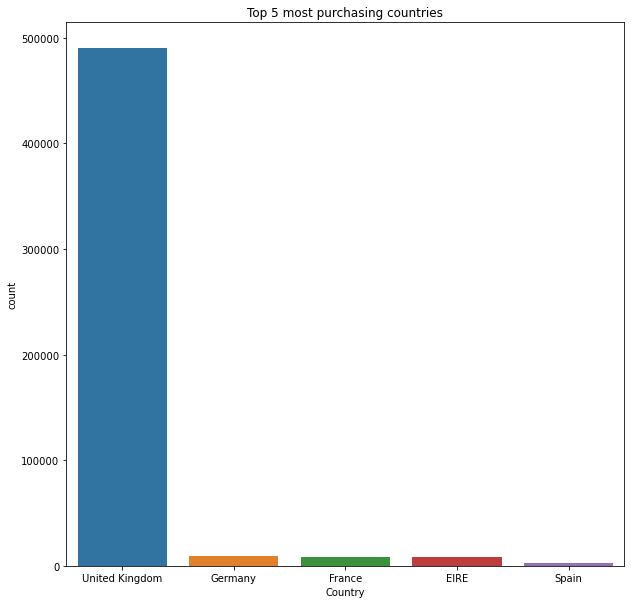

In [8]:
#Bar plot for top 5 countries in terms of number of purchases
plt.figure(figsize=(10,10))
sns.countplot(x='Country',data=df,order=df.Country.value_counts().iloc[:5].index)
plt.title('Top 5 most purchasing countries')

In [9]:
#Countries with unverified UserIds
df_new1 = df.set_index(['Country'])
unknowns_per_country = []
for c in countries:
    x=df_new1.loc[c]['UserId']
    unknowns_per_country.append(x[x==-1].count())
unknowns_per_country=pd.Series(unknowns_per_country,index=countries).sort_values(ascending=False)
unknowns_per_country #EDA Output-2

United Kingdom          133538
EIRE                       709
Hong Kong                  284
Unspecified                201
Switzerland                117
France                      66
Israel                      47
Portugal                    39
Bahrain                      2
Singapore                    0
Germany                      0
Austria                      0
Belgium                      0
Brazil                       0
Canada                       0
Channel Islands              0
Cyprus                       0
Czech Republic               0
Denmark                      0
United Arab Emirates         0
European Community           0
Finland                      0
USA                          0
Greece                       0
Saudi Arabia                 0
Sweden                       0
Iceland                      0
Spain                        0
Italy                        0
Japan                        0
Lebanon                      0
Lithuania                    0
Malta   

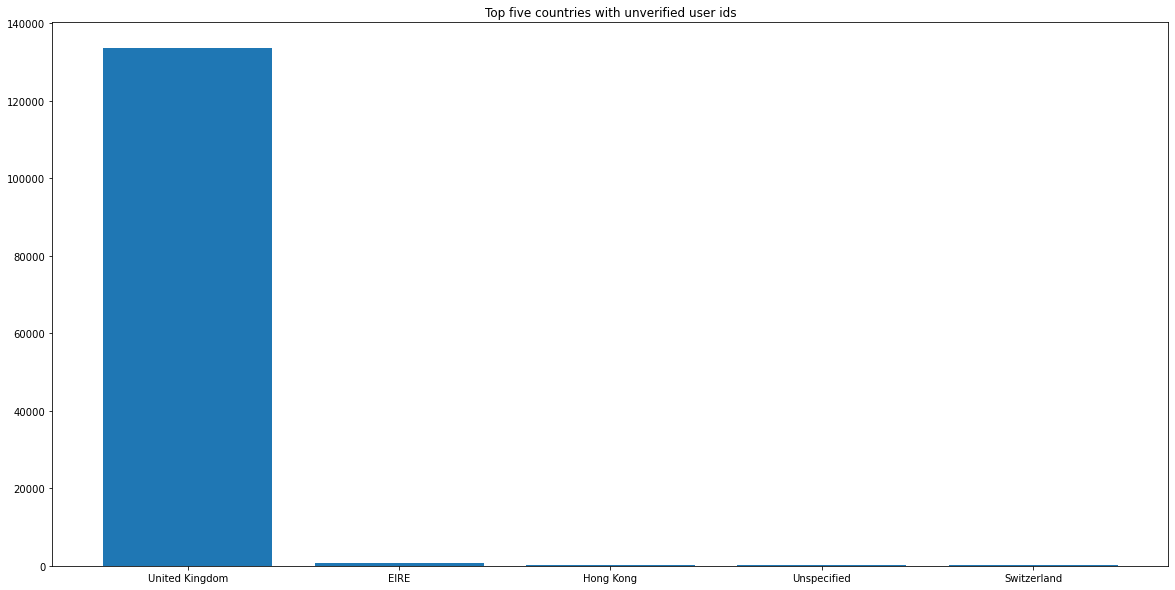

In [10]:
#Top 5 countries with the most unverified UserIds
plt.figure(figsize=(20,10))
plt.bar(unknowns_per_country[:5].index,unknowns_per_country[:5].values)
plt.title('Top five countries with unverified user ids')
plt.show()

#### 2. Most popular items and their average quantities sold per transaction:

Text(0.5, 1.0, 'Top 5 most popular items')

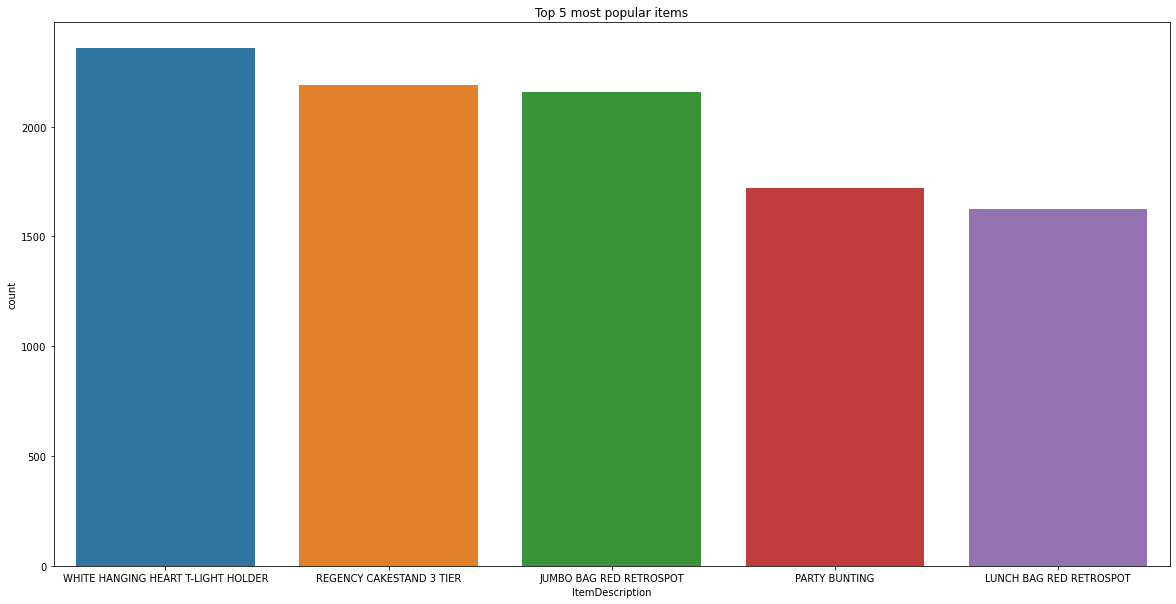

In [11]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='ItemDescription',data=df,order=df.ItemDescription.value_counts().iloc[:5].index)
plt.title('Top 5 most popular items')

In [12]:
#Average number of these items sold per transaction
x=df.ItemDescription.value_counts()[:5].index
df_new2=df.set_index(['ItemDescription','TransactionId']).drop_duplicates(keep='first')
mean_count=[]
for name in x:
    mean_count.append(np.round(df_new2.loc[name]['NumberOfItemsPurchased'].mean()))
mean_count=pd.Series(mean_count,index=x)
mean_count 

WHITE HANGING HEART T-LIGHT HOLDER    45.0
REGENCY CAKESTAND 3 TIER              18.0
JUMBO BAG RED RETROSPOT               67.0
PARTY BUNTING                         32.0
LUNCH BAG RED RETROSPOT               34.0
dtype: float64

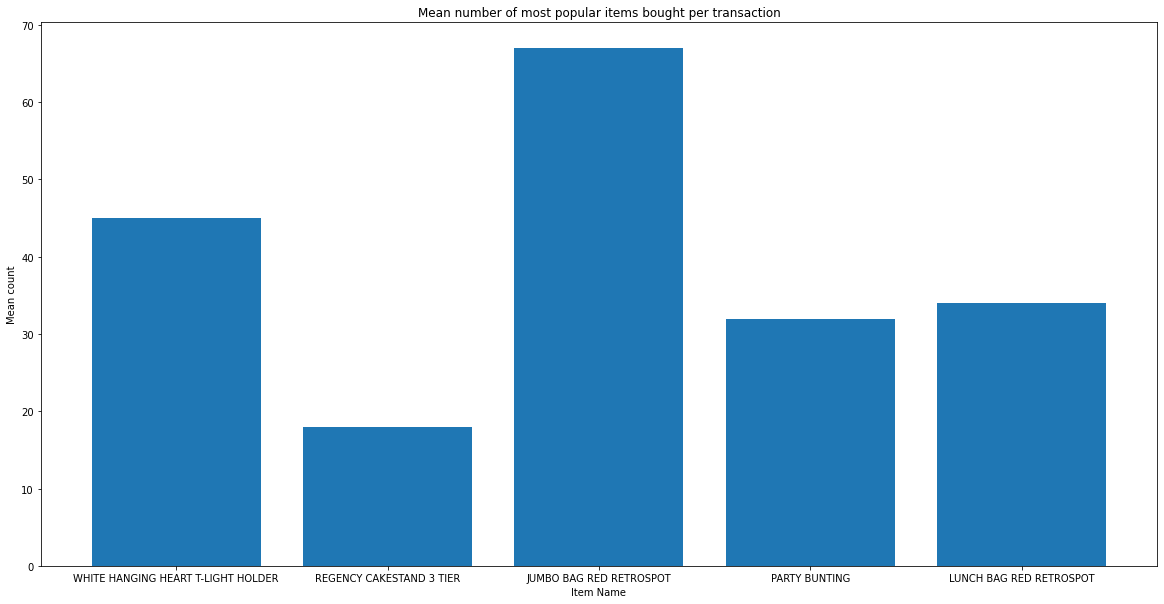

In [13]:
plt.figure(figsize=(20,10))
plt.bar(mean_count.index,mean_count.values)
plt.title('Mean number of most popular items bought per transaction')
plt.xlabel('Item Name')
plt.ylabel('Mean count')
plt.show()

#### 3. Most frequent customers based on total number of purchases (Same users with different transaction ids):

In [14]:
df_new3= df[['UserId','TransactionId']].set_index(['UserId'])
purchase_times=[]
for ids in np.unique(df_new3.index):
    purchase_times.append(len(np.unique(df_new3.loc[ids]['TransactionId'])))
purchase_times=pd.Series(purchase_times,index=np.unique(df_new3.index)).sort_values(ascending=False)
purchase_times #EDA Output-3

-1         3710
 313131     248
 267708     224
 374661     169
 306726     128
           ... 
 298116       1
 298179       1
 298284       1
 349986       1
 321300       1
Length: 4373, dtype: int64

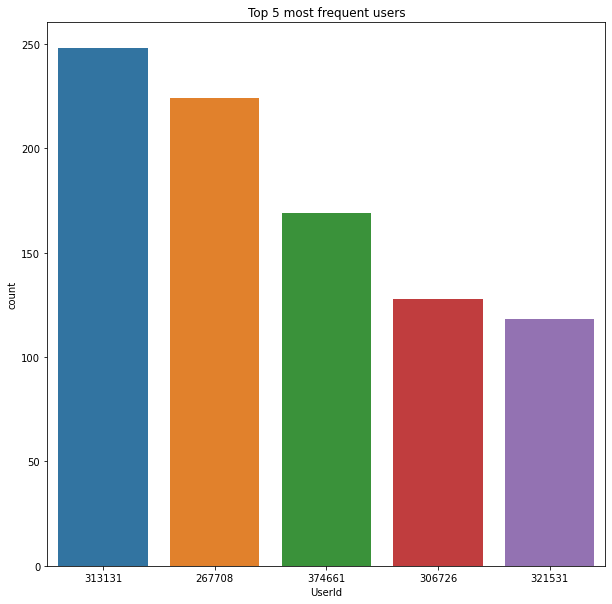

In [15]:
df_new3=df_new3.drop_duplicates(keep='first').reset_index()
plt.figure(figsize=(10,10))
sns.countplot(x='UserId',data=df_new3,order=df_new3.UserId.value_counts()[1:6].index) #Taking in only the registered UserIds
plt.title('Top 5 most frequent users')
plt.show()

## Customer Segmentation: -

#### 1. Segmentation by countries:

In [37]:
x = []
for c in countries: #countries - names of countries
    x.append(np.unique(df_new1.loc[c]['UserId'])) #df_new1 has index set to country
users_by_countries = pd.Series(x,index=countries)
users_by_countries #Segmentation Output-1

Australia               [260106, 260148, 260253, 260715, 260862, 26090...
Austria                 [259518, 259560, 259770, 259833, 259854, 26069...
Bahrain                                              [-1, 259413, 259455]
Belgium                 [259581, 259602, 259644, 259959, 259980, 26004...
Brazil                                                           [268149]
Canada                                   [323148, 366303, 366324, 374724]
Channel Islands         [303282, 305886, 313530, 313551, 313572, 31361...
Cyprus                  [259539, 259665, 259770, 260211, 260820, 26155...
Czech Republic                                                   [268401]
Denmark                 [259707, 259812, 260274, 260463, 260526, 26065...
EIRE                                         [-1, 294336, 297276, 313131]
European Community                                               [317268]
Finland                 [259308, 259875, 260505, 260988, 264222, 26432...
France                  [-1, 260673, 2

#### 2. Segmentation by one time/multitime purchases:

In [49]:
df_new4=df[['UserId','TransactionId']].set_index(['UserId'])
user_ids = np.unique(df_new4.index)[1:] #Starting from 1 to exclude unverified (-1) UserIds
multiple=[]
once=[]
for u in user_ids:
    count = len(np.unique(df_new4.loc[u]['TransactionId']))
    if count>1:
        multiple.append([u,count])
    else:
        once.append(u) 
multiple,once #Segmentation Output-2

([[259266, 2],
  [259287, 7],
  [259308, 4],
  [259392, 11],
  [259476, 3],
  [259518, 2],
  [259539, 6],
  [259560, 3],
  [259602, 13],
  [259623, 2],
  [259644, 4],
  [259665, 3],
  [259770, 4],
  [259791, 2],
  [259812, 3],
  [259875, 3],
  [259917, 2],
  [259959, 3],
  [259980, 5],
  [260001, 6],
  [260043, 6],
  [260064, 3],
  [260106, 2],
  [260148, 6],
  [260253, 4],
  [260274, 2],
  [260295, 15],
  [260337, 2],
  [260379, 4],
  [260463, 2],
  [260526, 3],
  [260547, 5],
  [260568, 9],
  [260589, 7],
  [260610, 3],
  [260652, 3],
  [260673, 5],
  [260694, 3],
  [260715, 26],
  [260757, 12],
  [260841, 5],
  [260862, 3],
  [260883, 9],
  [260904, 2],
  [260967, 5],
  [260988, 12],
  [261009, 4],
  [261051, 18],
  [261072, 5],
  [261093, 7],
  [261114, 4],
  [261135, 2],
  [261177, 19],
  [261198, 2],
  [261324, 5],
  [261429, 4],
  [261450, 2],
  [261471, 6],
  [261492, 3],
  [261534, 2],
  [261555, 6],
  [261576, 4],
  [261597, 12],
  [261618, 2],
  [261681, 2],
  [261702, 4],
 

#### 3. Segmentation based on Items Purchased:

In [38]:
df_new5=df.dropna().set_index('ItemDescription') #Dropping off NaN values from original df because ItemDescription has NaN values
item_names = np.unique(df_new5.index.astype('str'))
item_customers=[]
for i in item_names:
    item_customers.append(np.unique(df_new5.loc[i]['UserId']))
item_customers = pd.Series(item_customers,index=item_names)
item_customers #Segmentation Output-3

 4 PURPLE FLOCK DINNER CANDLES    [-1, 271677, 271740, 272013, 292929, 295491, 2...
 50'S CHRISTMAS GIFT BAG LARGE    [-1, 261933, 262332, 263340, 263802, 265041, 2...
 DOLLY GIRL BEAKER                [-1, 259539, 259602, 260001, 260295, 260337, 2...
 I LOVE LONDON MINI BACKPACK      [-1, 259539, 259602, 260253, 262878, 263907, 2...
 I LOVE LONDON MINI RUCKSACK                                               [307566]
                                                        ...                        
wrongly marked carton 22804                                                    [-1]
wrongly marked. 23343 in box                                                   [-1]
wrongly sold (22719) barcode                                                   [-1]
wrongly sold as sets                                                           [-1]
wrongly sold sets                                                              [-1]
Length: 4223, dtype: object

#### 4. Segmentation based on amount spent per transaction:

In [4]:
#Creating a dataframe with cost of transactions by multiplying quantity of product with its rate
df=df.sort_values(by='TransactionId')
transaction_ids = np.unique(df['TransactionId'])
net_costs_of_transaction=[]
for t in transaction_ids:
    x=df['TransactionId']==t
    costs = np.array((df[x]['NumberOfItemsPurchased'].values)*(df[x]['CostPerItem'].values))
    net_costs_of_transaction.append(costs.sum())
net_costs_of_transaction=pd.Series(net_costs_of_transaction,index=transaction_ids)
costs_per_transaction=net_costs_of_transaction.to_frame().reset_index().rename(columns={'index':'TransactionId', 0:'Cost'})

In [5]:
user_list=[]
for t in transaction_ids:
    user_list.append(df[df['TransactionId']==t]['UserId'].values[0]) 
costs_per_transaction['UserId']=user_list #Creating a column for corresponding UserIds

In [6]:
#Creating a function to categorise the amount spent into several different groups
def compute_group(costs):
    x=[]
    for c in costs:
        if c<=0:
            x.append('NA')
        elif c<100:
            x.append('A')
        elif c<300:
            x.append('B')
        elif c<500:
            x.append('C')
        elif c<1000:
            x.append('D')
        elif c<1500:
            x.append('E')
        elif c<2000:
            x.append('F')
        elif c<2500:
            x.append('G')
        else:
            x.append('H')
    x=np.array(x)
    return x

In [7]:
costs_per_transaction['CostGroup']=compute_group(costs_per_transaction['Cost'].values) #Adding the group column
costs_per_transaction=costs_per_transaction.sort_values(by=['CostGroup'])
costs_per_transaction=costs_per_transaction[costs_per_transaction['UserId']!=-1] #Excluding unregistred UserIds
costs_per_transaction.head()

,TransactionId,Cost,UserId,CostGroup
19899,6281473,42.24,375732,A
20463,6292858,68.34,331947,A
9792,6088511,41.04,367584,A
2152,5942761,52.80,267708,A
5881,6015878,36.51,377181,A


Text(0.5, 1.0, 'Groups count')

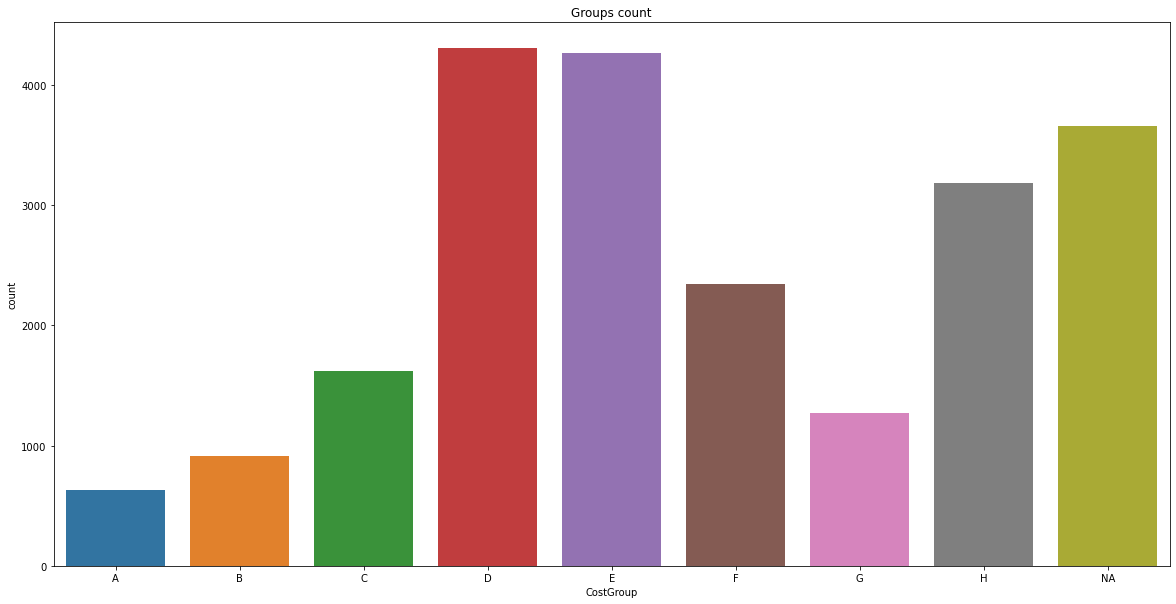

In [8]:
#Plotting count of users in each category
plt.figure(figsize=(20,10))
ax = sns.countplot(x='CostGroup',data=costs_per_transaction)
plt.title('Groups count')

In [25]:
#Customers belonging to more than one group or just one group
df_new6 = costs_per_transaction.set_index('UserId')
customer_multiple_groups=[]
customer_one_group=[]
users_multiple=[]
user_one=[]
for ids in np.unique(df_new6.index):
    x=np.unique(df_new6.loc[ids]['CostGroup'])
    if len(x)>1:
        customer_multiple_groups.append(x)
        users_multiple.append(ids)
    else:
        customer_one_group.append(x)
        user_one.append(ids)
customer_multiple_groups = pd.Series(customer_multiple_groups,index=users_multiple)
customer_one_group = pd.Series(customer_one_group,index=user_one)
print(customer_multiple_groups)
print(customer_one_group) #Segmentation Output-4

259266                [H, NA]
259287           [D, F, G, H]
259308           [D, E, F, H]
259392    [C, D, E, F, H, NA]
259476              [B, F, H]
                 ...         
383796                [E, NA]
383817                [C, NA]
383922                [C, NA]
383943           [A, C, D, E]
384027                 [B, H]
Length: 2771, dtype: object
259329     [H]
259350     [E]
259413     [C]
259434     [H]
259455     [F]
          ... 
383376    [NA]
383502     [D]
383838     [D]
383880     [D]
383901     [C]
Length: 1601, dtype: object


In [39]:
#Segmentation of customers into different amount spent categories
df_new7 = costs_per_transaction.sort_values(by=['CostGroup']).set_index('CostGroup')
groups=np.array(['A','B','C','D','E','F','G','H'])
user_groups=[]
for g in groups:
    user_groups.append(np.unique(df_new7.loc[g]['UserId']))
user_groups = pd.Series(user_groups,index=groups)
user_groups #Segmentation Output-5

A    [260001, 260589, 261093, 261555, 261954, 26199...
B    [259476, 260610, 260715, 261072, 261177, 26174...
C    [259392, 259413, 259644, 260043, 260421, 26056...
D    [259287, 259308, 259392, 259581, 259707, 25987...
E    [259308, 259350, 259392, 259602, 259623, 25964...
F    [259287, 259308, 259392, 259455, 259476, 25960...
G    [259287, 259518, 259539, 259560, 259602, 25981...
H    [259266, 259287, 259308, 259329, 259392, 25943...
dtype: object

## Application of K-Means Clusting Algorithm on the dataset: -

In [9]:
from sklearn.cluster import KMeans

In [10]:
model_input = costs_per_transaction[costs_per_transaction['Cost']>0].dropna().sort_values(by='Cost')
model_input

,TransactionId,Cost,UserId,CostGroup
19660,6276094,1.59,310800,A
18024,6246559,1.80,350049,A
3487,5970096,2.28,309624,A
2518,5950395,3.54,347634,A
1305,5925359,3.96,267708,A
...,...,...,...,...
17783,6241653,131491.98,366450,H
11531,6120884,161335.80,317058,H
2749,5955741,320608.80,259266,H
25859,6396313,699796.80,345366,H


In [11]:
model_input = model_input.iloc[:-1,:3].values #Excluding the last row due to very high value of cost and excluding the CostGroup Column

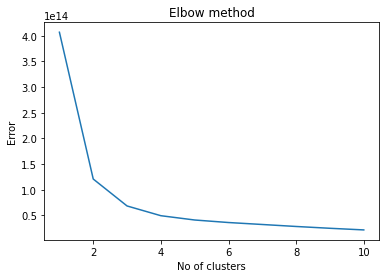

In [12]:
#Optimal K for WCSS error
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(model_input)
    kmeans.fit(model_input)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Text(0, 0.5, 'Amount spent per transaction')

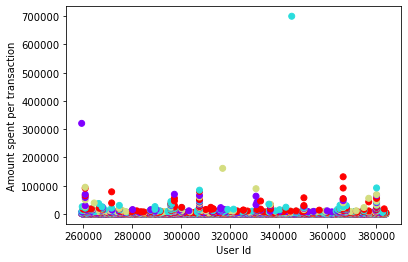

In [15]:
km=KMeans(n_clusters=4)
y_km=km.fit_predict(model_input)
#Amount Spent  vs User Ids
plt.scatter(model_input[:,2],model_input[:,1],c=y_km,cmap='rainbow')
plt.xlabel('User Id')
plt.ylabel('Amount spent per transaction')

## File Writing: -

In [32]:
file=open('EDA Results 1 - Countries and total purchase percentage .txt','w+')
file.write("Countries with their total purchase percentages\n")
file.write(count_countries.to_string()) #EDA Output-1
file.write("\n")
file.close()

In [35]:
file=open('EDA Results 2 - Unknown UserIds per country.txt','w+')
file.write("Countries with their count of unregistered UserIds (denoted as -1 in the dataset)\n")
file.write(unknowns_per_country.to_string()) #EDA Output-2
file.write("\n")
file.close()

In [36]:
file=open('EDA Results 3 - UserIds and number of overall purchases.txt','w+')
file.write("UserIds and their total number of purchases (same UserIds but different TransactionIds)\n")
file.write(purchase_times.to_string()) #EDA Output-3
file.write("\n")
file.close()

In [41]:
out1=users_by_countries.to_frame().reset_index().rename(columns={'index':'Country',0:'UserIds'})
out1.to_csv('Segmentation Results 1 - UserIds per countries.txt',sep=' ',index=False) #Segmentation Output-1

In [51]:
file=open('Segmentation Results 2 - Multi and One time customers.txt','a')
file.write('Multiple Time Users and their number of transactions\n')
file.write(str(multiple)) 
file.write('\nOne Time Users\n')
file.write(str(once))
file.close() #Segmentation Output-2

In [52]:
out2=item_customers.to_frame().reset_index().rename(columns={'index':'ItemName',0:'UserIds'})
out2.to_csv('Segmentation Results 3 - Items and UserId of purchasers.txt',sep=' ',index=False) #Segmentation Output-3

In [53]:
file=open('Segmentation Results 4 - UserIds belonging to multiple or one groups.txt','a')
file.write('UserIds belonging to multiple amount spent groups and their groups\n')
file.write(customer_multiple_groups.to_string())
file.write('\nUserIds belonging to one amount spent group and their group\n')
file.write(customer_one_group.to_string())
file.close() #Segmentation Output -4

In [54]:
out3=user_groups.to_frame().reset_index().rename(columns={'index':'CostGroup',0:'UserIds'})
out3.to_csv('Segmentation Results 5 - Different CostGroups and UserIds.txt',sep=' ',index=False) #Segmentation Output -5

### ...................................................................... END OF NOTEBOOK ................................................................................